- Use the Pima Indians dataset from UCI to predict whether or not an individual has diabetes
    - outcome is a binary variable
- Binary classification 


pima indians dataset: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [15]:
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

Matplotlib is building the font cache; this may take a moment.


# Load dataset

In [16]:
features = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree_function', 'age']
target = ['outcome']
pima_columns =  ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree_function', 'age', 'outcome']

In [12]:
pima_df = pd.read_csv("pima-indians-diabetes.data.csv", header = None, names = pima_columns)

In [13]:
pima_df.head(10)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [14]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 768 non-null    int64  
 1   glucose                     768 non-null    int64  
 2   blood_pressure              768 non-null    int64  
 3   skin_thickness              768 non-null    int64  
 4   insulin                     768 non-null    int64  
 5   bmi                         768 non-null    float64
 6   diabetes_pedigree_function  768 non-null    float64
 7   age                         768 non-null    int64  
 8   outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- there is no non-null data so no imputation is needed
- only 767 entries

# Explore Correlations

How are the features within this dataset correlated?

What does that mean if there is or isn't correlation?

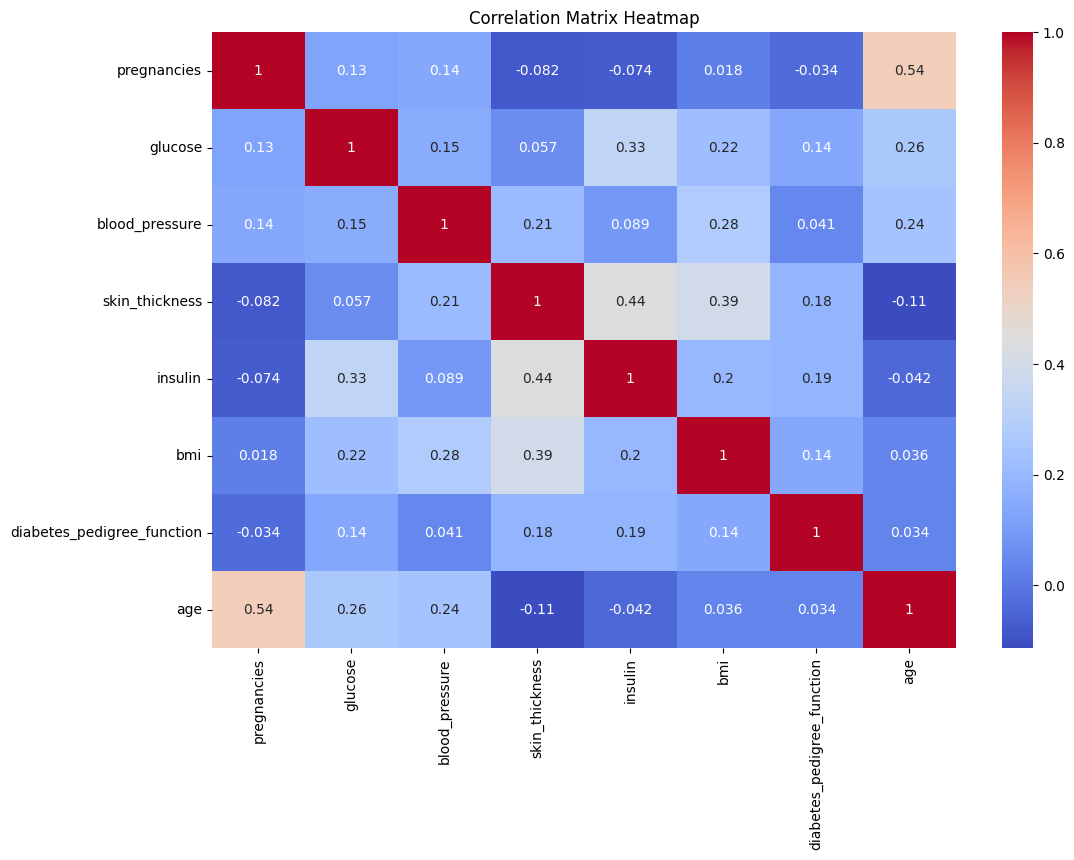

In [23]:

corr_matrix = pima_df[features].corr() # create corr. matrix

# create heatmap plot
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') # fmt =".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


# Feature Standardization

Do the features need to be standardized in some way?

If so how? MinMax, Standard?